In [1]:
# Linear Regression Optimization of Packaging Estimated Prices Project

In [3]:
# Standard libraries for loading data files and dataframe manipulation
import pandas as pd
import numpy as np

# Matplotlibfor plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Sklearn libraries for models. Linear regression will be used to benchmark
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
#Loading Data Set
# Read in class scores
df = pd.read_csv('prices008.csv')
df.head()

,CrtSize,Brdgm2,BrdPrice,Quantity,InkCover,InkPriceKg,Mcost,Price
0,144144,265,865,5000,1,10,1449,311
1,154112,265,895,100000,2,11,1753,26
2,116875,240,560,2000000,2,11,8313,9
3,116875,230,560,2000000,2,11,8313,9
4,116875,215,550,2000000,2,11,8313,9


In [9]:
#We check the shape of the dataset, 1358 rows by 8 columns. The last column in the price, which will be the output
df.shape

(1358, 8)

In [11]:
#We can see the most important statistics using the describe command
df.describe()

,CrtSize,Brdgm2,BrdPrice,Quantity,InkCover,InkPriceKg,Mcost,Price
count,1.358000e+03,1358.000000,1358.000000,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000
mean,4.149434e+05,274.557437,882.224595,1.540113e+05,1.961708,13.310751,2557.893962,212.696613
std,4.522260e+05,34.778434,308.820983,4.222087e+05,0.454251,7.172106,5087.287279,346.678152
min,2.528700e+04,215.000000,511.000000,1.000000e+03,1.000000,10.000000,723.000000,8.000000
25%,1.685002e+05,240.000000,615.000000,1.000000e+04,2.000000,12.000000,1000.250000,34.000000
50%,2.819200e+05,272.000000,865.000000,4.000000e+04,2.000000,12.000000,1307.500000,79.000000
75%,4.462150e+05,285.000000,940.000000,1.000000e+05,2.000000,14.000000,2108.000000,185.000000
max,3.608010e+06,450.000000,3780.000000,5.000000e+06,5.000000,160.000000,75719.000000,2142.000000


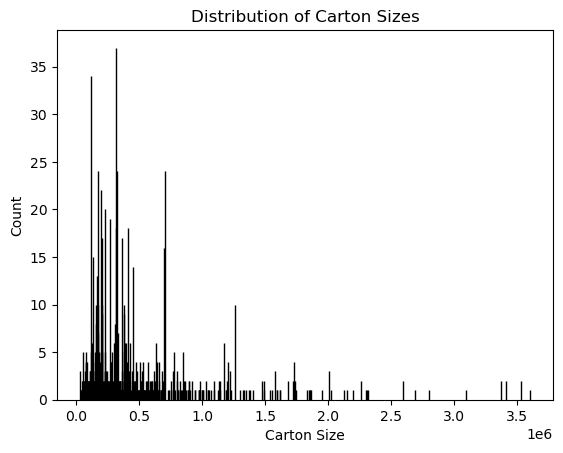

In [13]:
# Plot to show the carton size distribution
plt.bar(df['CrtSize'].value_counts().index, 
        df['CrtSize'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Carton Size'); plt.ylabel('Count'); plt.title('Distribution of Carton Sizes');


In [15]:
# This graphic clearly shows how being a narrow web press it mainly runs small to medium size cartons

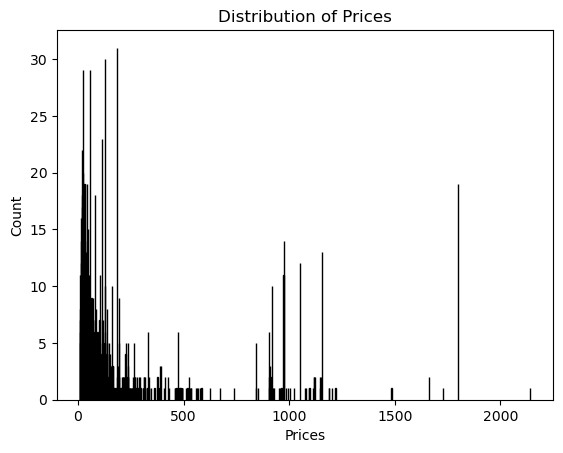

In [17]:
# Plot to show the prices distribution
plt.bar(df['Price'].value_counts().index, 
        df['Price'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Prices'); plt.ylabel('Count'); plt.title('Distribution of Prices');


In [19]:
# This graphic shows how prices are on the lower side of the distribution, meaning they are low.

In [21]:
# DATA SEPARATION IN TRAINING AND TESTING SETS

In [23]:
# In the next steps I separate the testing set from the training set.
from sklearn.model_selection import train_test_split

# Create a function to segregate the data. it takes a dataframe and returns 4 different sets
def dataset_segregation(df):
    # Segregation of y (price) from the data set
    prices = df['Price']
    
    # Drop the prices from the data set
    df = df.drop(columns=['Price'])
    
    # Split into training/testing sets with 15% split
    X_train, X_test, y_train, y_test = train_test_split(df, prices, 
                                                        test_size = 0.15, #test size is 15%
                                                        random_state=42) #to control random number generation
    #the function will return the x and y training and test sets. Testing set has been set to 15%
    return X_train, X_test, y_train, y_test

In [25]:
# Here we call the data segregation function and asign it to the 4 diferent sets.
X_train, X_test, y_train, y_test = dataset_segregation(df)
#Display the x training set to verify
X_train.head()

,CrtSize,Brdgm2,BrdPrice,Quantity,InkCover,InkPriceKg,Mcost
958,53371,235,860,100000,3,13,1411
174,507297,285,576,50000,2,12,826
479,364500,240,700,2000,2,12,880
589,405000,280,840,30000,3,12,941
382,146004,235,825,10000,2,12,1260


In [27]:
# Display the y training set
y_train.head()

958     24
174    105
479    474
589    128
382     26
Name: Price, dtype: int64

In [29]:
#Here we can verify the number of records on the training set and on the testing set
print(X_train.shape)
print(X_test.shape)

(1154, 7)
(204, 7)


In [31]:
#Total rows = 1358, trainig=1154, testing=204/15%. The segregation is correct

In [33]:
# Fitting and trainnig Standar Regression Models for comparison
# I decided to use a basic Linear Regression model to benchmark against my main Gradient Boosting Regressor

#Here I define the Linear Regression
model = LinearRegression(fit_intercept=True)


In [35]:
#Here Idefine the Gradient regressor trees model.
# The Hyperparameters where selected in order to optimize the model
#I was able to find the optimal hyperparameters as I had validation data not included in the data set to check real life prices
model2 = GradientBoostingRegressor(learning_rate=0.95,n_estimators=50)


In [37]:
# Here I fit the train set for the linear regression model
model.fit(X_train,y_train)

LinearRegression()

In [39]:
# Here is the fit for the Gradient Boosting Regression Model
model2.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.95, n_estimators=50)

In [41]:
# I calculate the predictios using the test set on both models
predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)

In [43]:
# Here I calculate the MAE and RMSE for the test predictions of both models
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
mae2 = np.mean(abs(predictions2 - y_test))
rmse2 = np.sqrt(np.mean((predictions2 - y_test) ** 2))

In [45]:
print('Model 1 MAE and RMSE median:',mae,rmse)
print('Model 2 MAE and RMSE median:',mae2,rmse2)


Model 1 MAE and RMSE median: 200.22910550013944 289.8418586815836
Model 2 MAE and RMSE median: 55.20693676773349 123.53996456560947


In [47]:
# It can be noticed that Model 1 Lineal Regression is not a good fit for this problem.
# On the other hand, the Gradiesnt Boosting Regressor model is a much better fit

In [49]:
# SINGLE PREDICTION 
# Here I load a file with a single set of inputs looking to get a price
# These inputs are real life "validation" set i left out of the dataset
df_single = pd.read_csv('pricessingle.csv')

In [51]:
# Here I display the value of the single input. The price of this carton was 150
df_single

,CrtSize,Brdgm2,BrdPrice,Quantity,InkCover,InkPriceKg,Mcost
0,380700,255,935,10000,2,14.2,1006.3


In [53]:
# Here is predict the price of the carton using both models
single_prediction = model.predict(df_single)
single_prediction2 = model2.predict(df_single)

In [55]:
print('Model 1 Single_prediction: ',single_prediction)
print('Model 2 Single_prediction: ',single_prediction2)

Model 1 Single_prediction:  [202.26507706]
Model 2 Single_prediction:  [145.79062191]


In [57]:
# As it can be seen, Model 2 has an error of 0.028. This would be an acceptable error in order to get a quick estimate

In [59]:
# As an extra Metric, I used the score() function on both models
model1score = model.score(X_test,y_test)
model2score = model2.score(X_test,y_test)
print('Model 1 Score: ', model1score)
print('Model 2 Score: ', model2score)

Model 1 Score:  -0.01983277377303505
Model 2 Score:  0.8147229201094637


In [61]:
# It is clear that the best performing model is the Gradient Boosting Regressor, considering that 1 is the ideal value to score